In [1]:
import random


Classical computer calculation

In [2]:
my_list=[1,2,3,4,5,6,7,8,9,10]

In [3]:
def the_oracle(my_input):
    winner=8
    if my_input is winner:
        response=True
    else:
        response=False
    return response

In [4]:
for index,trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print("Index of number in list:{}".format(index))
        print("{} call to the oracle used ".format(index+1))

Index of number in list:7
8 call to the oracle used 


Quantum computer calacualtion

In [5]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

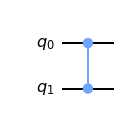

In [7]:
#define oracle circuit
oracle=QuantumCircuit(2,name="Oracle")
oracle.cz(0,1)
oracle.to_gate()
oracle.draw('mpl')

In [ ]:
##Statevector returns the amplitudes (which you can square to get the probabilities) and Qasm pretends that it's actually making measurements by sampling the probability distribution (the one determined by the amplitudes).

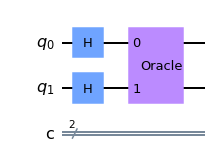

In [9]:
backend=Aer.get_backend('statevector_simulator')
grover_circ=QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw('mpl')

In [10]:
job=execute(grover_circ,backend)
result=job.result()

In [11]:
sv=result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [13]:
reflection =QuantumCircuit(2,name="Reflection")
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

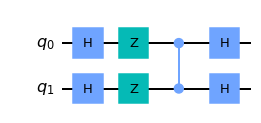

In [14]:
reflection.draw('mpl')

In [17]:
backend=Aer.get_backend('qasm_simulator')
grover_circ=QuantumCircuit(2,2)
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])

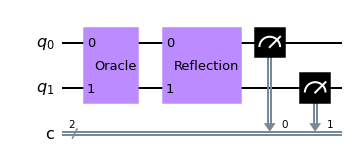

In [18]:
grover_circ.draw('mpl')

In [19]:
job=execute(grover_circ,backend,shot=1)
result=job.result()
result.get_counts()

{'11': 264, '10': 261, '01': 272, '00': 227}

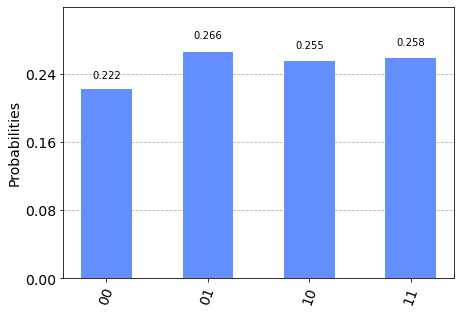

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())